In [1]:
import numpy as np 
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n
import math

ModuleNotFoundError: No module named 'sklearn'

                            experience  test_score(out of 10)  \
experience                    1.000000              -0.352557   
test_score(out of 10)        -0.352557               1.000000   
interview_score(out of 10)   -0.290480               0.186655   
salary($)                     0.908017              -0.077524   

                            interview_score(out of 10)  salary($)  
experience                                   -0.290480   0.908017  
test_score(out of 10)                         0.186655  -0.077524  
interview_score(out of 10)                    1.000000   0.037820  
salary($)                                     0.037820   1.000000  


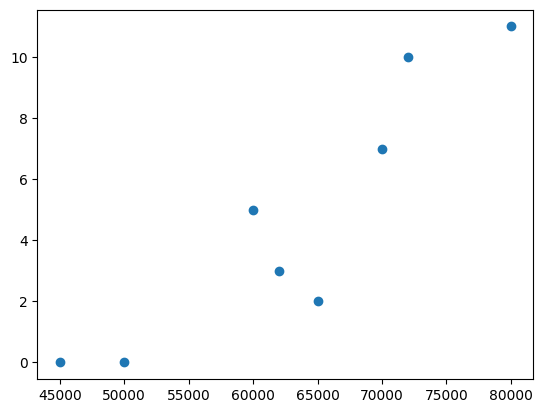

In [326]:
df=pd.read_csv("hiring.csv")
ktm=df.copy()
df.fillna({"experience":0,"test_score(out of 10)":math.floor(df["test_score(out of 10)"].mean())},inplace=True)
experience=df[["experience"]].to_numpy()
for i in range(len(experience)):
     if type(experience[i][0])==str:
         df.loc[i,'experience']=w2n.word_to_num(experience[i][0])

print(df.corr())
plt.scatter(df[["salary($)"]],df[["experience"]])

In [331]:
#Instead of all of this above we could have done #"
ktm.experience = ktm.experience.fillna("zero")
# ktm.experience = ktm.experience.apply(w2n.word_to_num)
ktm[["test_score(out of 10)"]]=ktm[["test_score(out of 10)"]].fillna(math.floor(ktm["test_score(out of 10)"].mean()))
ktm

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [258]:
model=linear_model.LinearRegression()
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df[["salary($)"]])

LinearRegression()

In [ ]:
print(model.score(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df[["salary($)"]]))
print(model.coeffs_)
print(model.bias_)
df

0.9770139014273139


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [260]:
print(" 2 yr experience, 9 test score, 6 interview score",model.predict([[2,9,6]])[0][0])
print("12 yr experience, 10 test score, 10 interview score",model.predict([[12,10,10]])[0][0])

 2 yr experience, 9 test score, 6 interview score 53713.86677124005
12 yr experience, 10 test score, 10 interview score 93747.79628650834


c:\Users\user\Desktop\ML Project\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\Desktop\ML Project\ml\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
